# Get Started

After forking this notebook, run the code in the following cell:

In [1]:
from matplotlib import pyplot as plt

In [2]:
# import package with helper functions 
import bq_helper

# create a helper object for this dataset
bitcoin_blockchain = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                              dataset_name="bitcoin_blockchain")

Then write the code to answer the questions below.

#### Note
This dataset is bigger than the ones we've used previously, so your queries will be more than 1 Gigabyte. You can still run them by setting the "max_gb_scanned" argument in the `query_to_pandas_safe()` function to be large enough to run your query, or by using the `query_to_pandas()` function instead.

## Questions
#### 1) How many Bitcoin transactions were made each day in 2017?
* You can use the "timestamp" column from the "transactions" table to answer this question. You can go back to the [order-by tutorial](https://www.kaggle.com/dansbecker/order-by) for more information on timestamps.

In [3]:
bitcoin_blockchain.list_tables()

['blocks', 'transactions']

In [4]:
bitcoin_blockchain.head('transactions')

,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1508261913000,1a95502f0ad12163940512b7cd95fdf01adfd4d9080887...,[{'input_script_bytes': b'G0D\x02 U]\xdf\xe5\x...,"[{'output_satoshis': 9098209, 'output_script_b...",0000000000000000002068d86d272d3031017a9ad92a57...,000000000000000000054053a5702632941bcba2137254...,30990a2305eab4dbfa274ae64a0c82e5847f7cca934fc8...,1840630893,536870912,51402639154,None
1,1414430043000,3a1f9b856ebc1d91033f9a1736e99a0882997ca7f95997...,[{'input_script_bytes': b'G0D\x02 0\x89\x0c\x9...,"[{'output_satoshis': 2462702561, 'output_scrip...",000000000000000006f607016c0a74036acab89e6c007f...,00000000000000000c2af079b051facc49f9c8cc50691c...,cae29917261b62dbc8fdc52e9dda8453fba8439f257200...,347012242,2,1545595064,None
2,1315846149000,0ead540d6d36b7d8fb8dad5c3cbf04afc50e7fe9352a7b...,[{'input_script_bytes': b'H0E\x02!\x00\xbe\x8c...,"[{'output_satoshis': 22900000, 'output_script_...",00000000000003c1f97fc28e3242ec52208e8595ac651c...,00000000000004add1b83df17ca32fc54aed9b6e7020ce...,454cd16df34bc2262608146e2da98c066a27ca8c6a4e52...,1329317129,1,76355,None
3,1478361179000,fd4f4e8567ba208f2a595049e077976ccf1bb635571b3c...,[{'input_script_bytes': b'H0E\x02!\x00\xa1\xb2...,"[{'output_satoshis': 4014339, 'output_script_b...",0000000000000000033c5bbb5aa43f276e3701168b7e43...,00000000000000000073a63eb7045711d8b7d27f2a1394...,0fed153bbbb6658eb1c64ca2180d76e3755a4a8e407890...,1092303640,536870912,10892986963,None
4,1524232610000,a13df138ba04e9ff9923639be51f197c486bc9fa236d94...,[{'input_script_bytes': b'\x00H0E\x02!\x00\xfb...,"[{'output_satoshis': 290060, 'output_script_by...",0000000000000000003189004cfa910af816288e0e852d...,0000000000000000003edcf159d347610c18037ed482a7...,caf762d0fe1cd098e43cf17db29693f8926db0f0030e9f...,2284157588,536870912,164899921376,None


In [5]:
bitcoin_blockchain.table_schema('transactions')

[SchemaField('timestamp', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('transaction_id', 'STRING', 'NULLABLE', None, ()),
 SchemaField('inputs', 'RECORD', 'REPEATED', None, (SchemaField('input_script_bytes', 'BYTES', 'NULLABLE', None, ()), SchemaField('input_script_string', 'STRING', 'NULLABLE', None, ()), SchemaField('input_script_string_error', 'STRING', 'NULLABLE', None, ()), SchemaField('input_sequence_number', 'INTEGER', 'NULLABLE', None, ()), SchemaField('input_pubkey_base58', 'STRING', 'NULLABLE', None, ()), SchemaField('input_pubkey_base58_error', 'STRING', 'NULLABLE', None, ()))),
 SchemaField('outputs', 'RECORD', 'REPEATED', None, (SchemaField('output_satoshis', 'INTEGER', 'NULLABLE', None, ()), SchemaField('output_script_bytes', 'BYTES', 'NULLABLE', None, ()), SchemaField('output_script_string', 'STRING', 'NULLABLE', None, ()), SchemaField('output_script_string_error', 'STRING', 'NULLABLE', None, ()), SchemaField('output_pubkey_base58', 'STRING', 'NULLABLE', None, ()), Sch

In [6]:
# Bitcoin transactions each day in 2017
# Notice that this version appears to be less efficient than the next

dayTransactionsQuery = """
WITH time AS
    (
        SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time, transaction_id
        FROM `bigquery-public-data.bitcoin_blockchain.transactions`
    )
SELECT EXTRACT(DAYOFYEAR FROM trans_time) AS day, 
    EXTRACT(YEAR FROM trans_time) AS year,
    COUNT(transaction_id) AS transactions
FROM time
WHERE EXTRACT(YEAR FROM trans_time) = 2017
GROUP BY year, day
ORDER BY year, day
""" 

print(bitcoin_blockchain.estimate_query_size(dayTransactionsQuery))

21.745912680402398


In [7]:
# Bitcoin transactions each day in 2017
# Notice that this version appears to save a lot on the query size
dayTransactionsQuery = """
WITH time AS
    (
        SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time, transaction_id
        FROM `bigquery-public-data.bitcoin_blockchain.transactions`
    )
SELECT EXTRACT(DAYOFYEAR FROM trans_time) AS day, 
    EXTRACT(YEAR FROM trans_time) AS year,
    COUNT(*) AS transactions
FROM time
WHERE EXTRACT(YEAR FROM trans_time) = 2017
GROUP BY year, day
ORDER BY year, day
""" 

print(bitcoin_blockchain.estimate_query_size(dayTransactionsQuery))

2.3509094789624214


In [8]:
df1 = bitcoin_blockchain.query_to_pandas_safe(dayTransactionsQuery, max_gb_scanned=2.5)

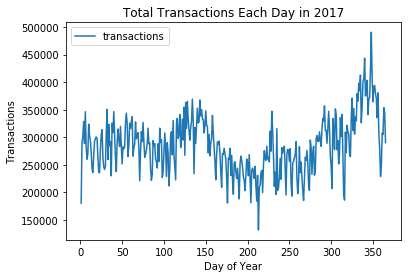

In [9]:
df1.sort_values('day').plot(x='day', y='transactions')
plt.title('Total Transactions Each Day in 2017')
plt.ylabel('Transactions')
plt.xlabel('Day of Year');


#### 2) How many transactions are associated with each merkle root?
* You can use the "merkle_root" and "transaction_id" columns in the "transactions" table to answer this question. 

In [10]:
query2 = """ 
            SELECT COUNT(transaction_id) AS transactions
            FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            GROUP BY merkle_root 
            ORDER BY merkle_root
        """
transactions_merkle = bitcoin_blockchain.query_to_pandas_safe(query2, max_gb_scanned=40)

In [11]:
transactions_merkle.head()

,transactions
0,2437
1,1
2,455
3,146
4,44


---
# Keep Going
[Click here](https://www.kaggle.com/dansbecker/joining-data) to learn how to combine multiple data sources with the JOIN command.

# Feedback
Bring any questions or feedback to the [Learn Discussion Forum](kaggle.com/learn-forum).

----

*This tutorial is part of the [SQL Series](https://www.kaggle.com/learn/sql) on Kaggle Learn.*